In [2]:
import numpy as np
import pandas as pd
import csv
titletwo=np.zeros(225)
df = pd.read_csv("dataset_f.csv", index_col=False, header=None)
print(df.shape)

(1920, 227)


In [3]:
numpy_matrix = df.values
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]

In [8]:
from sklearn.model_selection import GroupKFold
from numpy import random
import math
import numpy.matlib
from scipy import stats
import scipy as sc
import operator
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

numpy_matrix = df.as_matrix()
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]
groups = np.array(personsLabel)
group_kfold = GroupKFold(n_splits=8)
eficienciaTrain=np.zeros(8)
eficienciaTest=np.zeros(8)
accurrancy=np.zeros(8)
indexPredict=[]
j=0
for train_index, test_index in group_kfold.split(X, Y, groups):
   

    Xtrain = X[train_index,:]
    Ytrain = Y[train_index]
    Xtest = X[test_index,:]
    Ytest = Y[test_index]

    #media = np.mean(X_train)
    #desvia = np.std(X_train)
    #Xtrain = sc.stats.stats.zscore(X_train)
    #Xtest = (X_test - np.matlib.repmat(media, X_test.shape[0], 1))/np.matlib.repmat(desvia, X_test.shape[0], 1)
    #scaler = preprocessing.StandardScaler().fit(Xtrain)
    #Xtrain = scaler.transform(Xtrain)
    #Xtest = scaler.transform(Xtest)


    parameters = {'n_neighbors':[1,7]}
    neigh = KNeighborsClassifier()   
    groups = np.array(personsLabel)   
    group_kfold = GroupKFold(n_splits=7)
    clf = GridSearchCV(neigh, parameters, cv=group_kfold.split(Xtrain, Ytrain, groups[train_index]))
    clf.fit(Xtrain,Ytrain)
    
    y_predTrain=clf.predict(Xtrain)
    y_predTest = clf.predict(Xtest)
   
    eficienciaTrain[j]=np.mean(y_predTrain.ravel() == Ytrain.ravel())
    eficienciaTest[j]=np.mean(y_predTest.ravel() == Ytest.ravel())
    print('Eficiencia durante la validación = ' + str(np.mean(eficienciaTest)) + '+-' + str(np.std(eficienciaTest)))
    
       
    j=j+1
print(clf.best_estimator_)
print('Eficiencia durante la validación = ' + str(np.mean(eficienciaTest)) + '+-' + str(np.std(eficienciaTest)))
  

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


Eficiencia durante la validación = 0.096875+-0.2563071582593822
Eficiencia durante la validación = 0.20833333333333334+-0.3620207560040968
Eficiencia durante la validación = 0.32135416666666666+-0.41639281365126446
Eficiencia durante la validación = 0.40520833333333334+-0.41074304915671495
Eficiencia durante la validación = 0.5177083333333333+-0.40759259982310225
Eficiencia durante la validación = 0.6057291666666667+-0.3594817927074951
Eficiencia durante la validación = 0.7166666666666667+-0.2845714370378338
Eficiencia durante la validación = 0.8177083333333333+-0.08729514710643047
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')
Eficiencia durante la validación = 0.8177083333333333+-0.08729514710643047


In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
y_predict=clf.predict(X_test)

print(y_predict)
print('Accuracy: ', accuracy_score(y_test, y_predict), '\n')
report = classification_report(y_test, y_predict)
print("\nclassification report :\n",report )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 3. 3. 2. 3. 3. 2. 3. 2. 2. 3. 3. 3.
 0. 2. 3. 3. 0. 2. 3. 2. 0. 2. 3. 2. 3. 3. 2. 2. 2. 2. 2. 2. 2. 3. 2. 3.
 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.]
Accuracy:  0.8083333333333333 


classification report :
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94        60
         1.0       1.00      0.98      0.99        60
         2.0       0.59      0.95      0.73     

In [29]:
print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [30]:
print(y_predict)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 3. 3. 2. 3. 3. 2. 3. 2. 2. 3. 3. 3.
 0. 2. 3. 3. 0. 2. 3. 2. 0. 2. 3. 2. 3. 3. 2. 2. 2. 2. 2. 2. 2. 3. 2. 3.
 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3.]


Text(0.5, 1.0, 'Matriz de confusión')

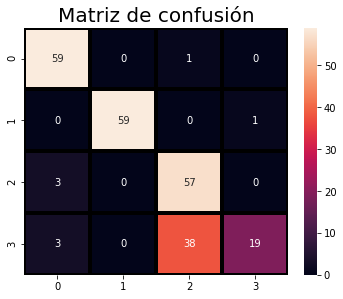

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)

In [35]:
from sklearn.metrics import recall_score

In [38]:
df=clf.cv_results_
df2=pd.DataFrame(df)
df2

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.025484,0.003904,0.332425,0.013038,1,{'n_neighbors': 1},0.9625,0.991667,1.0,0.9,...,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.025520,0.002605,0.342584,0.010292,7,{'n_neighbors': 7},0.9875,0.995833,1.0,0.9,...,1,0.997222,0.998611,0.996528,0.996528,0.997222,0.997917,0.997222,0.997321,0.000687


In [1]:
!pip install mlxtend

In [10]:
def select_features(modelo, n_features, fwd, fltg):
    
    sfs = SFS(modelo, 
           k_features=n_features, 
           forward=fwd,
           floating=fltg,
           verbose=1,
           scoring='accuracy',
           cv=0)
    
    return sfs


In [13]:
from sklearn.model_selection import GroupKFold
from numpy import random
import math
import numpy.matlib
from scipy import stats
import scipy as sc
import operator
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

numpy_matrix = df.as_matrix()
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]
groups = np.array(personsLabel)
group_kfold = GroupKFold(n_splits=8)
eficienciaTrain=np.zeros(8)
eficienciaTest=np.zeros(8)
accurrancy=np.zeros(8)
indexPredict=[]
parameters = {'n_neighbors':[7]}
neigh = KNeighborsClassifier()   
Errores = np.ones(10)   
j=0
for train_index, test_index in group_kfold.split(X, Y, groups):
   
    tiempo_i = time.time()
    Xtrain = X[train_index,:]
    Ytrain = Y[train_index]
    Xtest = X[test_index,:]
    Ytest = Y[test_index]
    
    
    n_features=60
    sf =select_features(clf.best_estimator_, n_features,True,True )
    sf = sf.fit(Xtrain,Ytrain)
    Errores[j] = 1-sf.k_score_
    j+=1
    
    Errores[j] = 1-sf.k_score_
    j+=1
print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )
print ("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.")

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   21.9s finished
Features: 1/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 2/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 223 out of 223 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
Features: 3/60[Pa

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.0s finished
Features: 26/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 199 out of 199 | elapsed:   26.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    2.9s finished
Features: 27/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   25.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.5s finished
Features: 28/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 197 out of 197 | elapsed:   27.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elaps

[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    7.6s finished
Features: 52/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 173 out of 173 | elapsed:   28.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    8.0s finished
Features: 53/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 172 out of 172 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    8.3s finished
Features: 54/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 171 out of 171 | elapsed:   28.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elaps

[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:   25.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.8s finished
Features: 19/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 206 out of 206 | elapsed:   22.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.9s finished
Features: 20/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:   22.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.2s finished
Features: 21/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 204 out of 204 | elaps

[Parallel(n_jobs=1)]: Done 181 out of 181 | elapsed:   23.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    5.6s finished
Features: 45/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   25.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.2s finished
Features: 46/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 179 out of 179 | elapsed:   25.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    6.5s finished
Features: 47/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 178 out of 178 | elaps

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
Features: 11/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 214 out of 214 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    1.0s finished
Features: 12/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 213 out of 213 | elapsed:   20.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.0s finished
Features: 13/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 212 out of 212 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elaps

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.6s finished
Features: 37/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 188 out of 188 | elapsed:   25.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    4.8s finished
Features: 38/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 187 out of 187 | elapsed:   25.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    4.9s finished
Features: 39/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 186 out of 186 | elapsed:   25.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  39 out of  39 | elaps

[Parallel(n_jobs=1)]: Done 222 out of 222 | elapsed:    9.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 4/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 221 out of 221 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 5/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 6/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 219 out of 219 | elapsed:

[Parallel(n_jobs=1)]: Done 196 out of 196 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.6s finished
Features: 30/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
Features: 31/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 194 out of 194 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    1.7s finished
Features: 32/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 193 out of 193 | elaps

[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    6.2s finished
Features: 56/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 169 out of 169 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:    6.6s finished
Features: 57/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:    6.6s finished
Features: 58/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 167 out of 167 | elaps

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.0s finished
Features: 22/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.1s finished
Features: 23/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished
Features: 24/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 201 out of 201 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elaps

[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.9s finished
Features: 48/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 177 out of 177 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.9s finished
Features: 49/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.9s finished
Features: 50/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elaps

[Parallel(n_jobs=1)]: Done 211 out of 211 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.5s finished
Features: 15/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.5s finished
Features: 16/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 209 out of 209 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished
Features: 17/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 208 out of 208 | elaps

[Parallel(n_jobs=1)]: Done 185 out of 185 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.3s finished
Features: 41/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 184 out of 184 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.4s finished
Features: 42/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 183 out of 183 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    2.4s finished
Features: 43/60[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 182 out of 182 | elaps

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
 print("\nError de validación aplicando SFS: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

    print("\nEficiencia en validación aplicando SFS: " + str(sf.k_score_*100) + "%" )
